# Planning

### Projcet Overview

The goal of this project is to build a classification model to predict whether a breast tumor is malignant or benign based on various diagnostic measurements. This will be done using a dataset sourced from Kaggle containing features such as mean radius, texture, area, smoothness, and more, derived from digitized images of breast mass samples.

The objective is to assess whether diagnostic variables can be used to accurately classify cancer type, thereby contributing to improved early detection in clinical settings. The model will serve as a proof-of-concept that could be used in larger-scale screening systems.



### What is Classification?

According to Keita (2024), classification is a supervised learning technique used when the output variable is categorical (i.e., it belongs to one of several groups). Unlike regression, which predicts continuous outcomes, classification predicts discrete labels. The algorithm learns from labelled input data to assign new examples to the correct class. In this project, the task is binary classification: predicting whether a tumor is malignant or benign based on the given features.

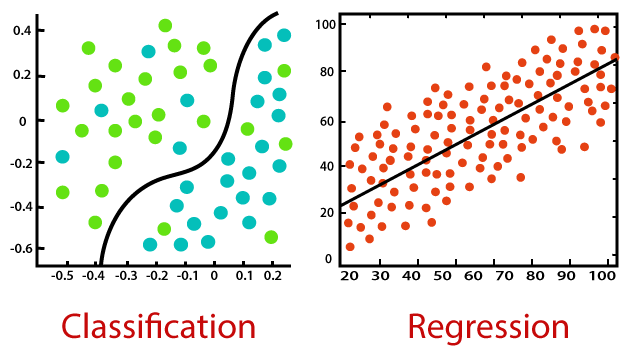

### Dataset Justification

The dataset, available on Kaggle (https://www.kaggle.com/datasets/erdemtaha/cancer-data), is highly appropriate for this task and complements the objectives explored in the insurance model from Part 1. It contains real-world diagnostic data from breast cancer cases, including 30 numeric features extracted from digitized images of fine needle aspirate (FNA) biopsies. These features capture detailed characteristics of cell nuclei, which are used to classify tumors as malignant or benign.

This dataset aligns closely with the insurance context, where medical aid providers assess patient risk based on health conditions. Just as the insurance model aimed to predict charges based on individual risk factors (such as age, BMI, and smoking status), this dataset enables us to classify cancer diagnoses — a condition that would significantly influence an individual's insurance premiums and healthcare costs. By accurately identifying whether a tumor is malignant, insurers could better estimate risk profiles and allocate appropriate medical aid coverage.

Furthermore, the binary nature of the target variable (Malignant = 1, Benign = 0) makes it suitable for supervised classification models like logistic regression, random forest, and SVM. The structured, numeric nature of the data also minimizes the need for extensive encoding, allowing for a more streamlined machine learning workflow while exploring critical medical patterns that hold direct relevance for insurance risk assessment and healthcare decision-making.

### Justification of Model

The Random Forest Classifier was selected as the initial model for this breast cancer classification task due to its strong performance, robustness, and versatility in handling structured tabular data. Given that the dataset contains multiple numerical features and potential interactions between them, RFC is well-suited as it can capture complex, non-linear relationships without requiring extensive preprocessing or feature scaling. Unlike models such as Logistic Regression or Support Vector Machines, Random Forests are less sensitive to multicollinearity and outliers, which are known to exist in this dataset. Additionally, RFC provides built-in methods for estimating feature importance, helping identify which diagnostic measurements are most predictive of cancer outcomes. Its ability to generalize well, combined with low risk of overfitting due to ensemble learning, made it a logical first choice for establishing a strong baseline in this binary classification problem.

### What is Random Forest Classifier

Random Forest is a supervised machine learning algorithm that operates by constructing a collection of decision trees and combining their outputs to make more accurate and robust predictions (GeeksforGeeks, 2025). It is commonly used for both classification and regression tasks. The core idea behind the Random Forest algorithm is based on ensemble learning, where multiple models (in this case, decision trees) are trained independently and their results are combined.

## Exploratory Data Analysis (EDA) - Plan

EDA is the process of using visually and statistically understanding data and summarizing their main characteristics. 

### Step by Step Plan

1. Load the data
    
    - In this step we load the dataset in via pandas so that it can be analysed and manipulated easily.
    
    - The code we use is: df = pd.read_csv("csvfilename.csv")

2. Initial inspection of data
    - In this step we get more insight with regards to the data.

    - The code we use are:
        - Check for missing values, duplicate entries, and formatting inconsistencies.
        
        - Explore sentiment label distribution (if available) using bar plots or pie charts.

        - remove unnecessary columns    

3. Data Cleaning and Preprocessing
    - Tokenization: via spaCy or nltk.word_tokenize() to split text into words.

    - Stopword Removal: using built-in stopword lists from spaCy or nltk.

    - Stemming: using nltk.PorterStemmer or nltk.SnowballStemmer.

    - Lemmatization: performed with spaCy for accurate root word reduction.

    - Lowercasing & punctuation removal: with re (regex) and string processing.

    - Named Entity Recognition (NER): using spaCy to extract entities (e.g., company names, locations, personal names).



## Feature Extraction

- Bag of Words (BoW): using CountVectorizer from scikit-learn.

- TF-IDF: using TfidfVectorizer for feature weighting.

- Sentence Embeddings: using sentence-transformers (model: all-MiniLM-L6-v2) to capture semantic meaning for advanced use cases.

- NER Output: used optionally to enrich feature understanding or for filtering brand-specific mentions.

## Model Training Plan

### Unsupervised Topic Modeling

For identifying broad areas of concern
   - Use Latent Dirichlet Allocation (LDA) from sklearn.decomposition.

   - Analyze topic distribution across reviews.

   - Visualize top keywords per topic using word clouds or bar charts.

   - Determine the number of topics using coherence scores or elbow method.

### Supervised Sentiment Classification

For evaluating customer sentiment toward services:
   - Label Encoding: Convert TextBlob polarity scores into categories (Negative, Neutral, Positive).

   - Train/Test Split: Standard 80/20 split.

   - Vectorization: Use TF-IDF for training the classifier.

   - Model: Train a Logistic Regression.

   - Pipeline: Use Pipeline from sklearn to chain vectorization and classification.

   - Alternative: Use transformers.pipeline('sentiment-analysis') for comparison.

## Model Evaluation

We will evaluate the models using classification metrics:

- Classification Report: Accuracy, precision, recall, F1-score.

- Confusion Matrix: Visual display of model predictions.

- Sentiment Distribution: Bar or pie charts to show sentiment ratios.

- Word Clouds: Separate word clouds for each sentiment class.

- Topic Bar Charts: Show most frequent terms per topic.

- Interactive Output: Build a Gradio interface to let users input text and see live topic extraction, sentiment prediction, and named entities.

## Report Planning

The final report will:

- Explain data preprocessing steps and rationale.

- Present findings from topic modeling (including visual insights).

- Show sentiment classification performance with metrics.

- Highlight actionable recommendations based on customer feedback patterns.

- Include interactive components via Gradio (bonus engagement).

# Code Analysis

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from textblob import TextBlob
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Downloads
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lab_services_student\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lab_services_student\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


## Exploratory Data Analysis (EDA)

### Loading Dataset (EDA)

This step is fundamental. We’re inspecting data types, column names, and whether immediate cleaning is needed.

In [149]:
# Load dataset
df = pd.read_csv("Final Data.csv")  # Adjust path

df.head()

,Unnamed: 0,Customer Name,Customer Location,Review Text
0,0,Sarah Hoelscher,US,Easy to use and understand! Qu...
1,1,Bruce Winslow,CR,It was a real pleasure to spea...
2,2,Kelly Wilmeth,US,Byron Preston was super helpfu...
3,3,Stephanie LeBlanc,US,Byron Preston was amazing walk...
4,4,JPD,US,"Thanks Josh, top rate service ..."


### Checking dataset structure (EDA)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44934 entries, 0 to 44933
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         44934 non-null  int64 
 1   Customer Name      44934 non-null  object
 2   Customer Location  44934 non-null  object
 3   Review Text        44934 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


### Removing unneccasary columns

In [151]:
# Keep only useful columns
df = df[["Review Text"]]

### Summary Statistics

In [152]:
df.describe()

,Review Text
count,44934
unique,44700
top,Excellent service
freq,14


### Check if any null values in the dataset (EDA)

In [153]:
# Check for missing values in the dataset
df.isnull().sum()  

Review Text    0
dtype: int64

In [154]:
review_duplicates = df["Review Text"].duplicated().sum()
print(f"Duplicate review texts: {review_duplicates}")

Duplicate review texts: 234


In [155]:
df.drop_duplicates(inplace=True)

df = df.rename(columns=lambda x: x.strip())
df.head()

,Review Text
0,Easy to use and understand! Qu...
1,It was a real pleasure to spea...
2,Byron Preston was super helpfu...
3,Byron Preston was amazing walk...
4,"Thanks Josh, top rate service ..."


In [156]:
df_sampled = df.sample(n=5000, random_state=42).reset_index(drop=True)

### Encoding categorical values

In [157]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(lemmatized)

df_sampled["cleaned_review"] = df_sampled["Review Text"].apply(preprocess_text)


In [158]:
# Vectorize
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_topics = vectorizer.fit_transform(df_sampled["cleaned_review"])

# Fit LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X_topics)

# Display topics
def display_topics(model, feature_names, num_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)



Topic 1:
question answer helpful explain patient knowledgeable help great time thank

Topic 2:
service customer great excellent good company thank experience professional work

Topic 3:
need help plan insurance policy good feel friendly helpful medicare

Topic 4:
claim handle mind timely peace great year coverage time thank

Topic 5:
jeweler company mutual jewelry claim insure process recommend ring insurance

Topic 6:
easy process quick insurance online use coverage application simple price

Topic 7:
insurance professional recommend policy helpful efficient knowledgeable company agent thank

Topic 8:
easy process helpful thank fast quick experience great efficient good

Topic 9:
njm car insurance claim year company repair work shop time

Topic 10:
email insurance policy payment send time receive pay day year


In [159]:
def label_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    else:
        return "Negative"

df_sampled["sentiment"] = df_sampled["Review Text"].apply(label_sentiment)


## Model Development

In [160]:
X = df_sampled["cleaned_review"]
y = df_sampled["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')),
    ("clf", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


## Model Evaluation

              precision    recall  f1-score   support

    Negative       0.85      0.12      0.21       142
    Positive       0.87      1.00      0.93       858

    accuracy                           0.87      1000
   macro avg       0.86      0.56      0.57      1000
weighted avg       0.87      0.87      0.83      1000



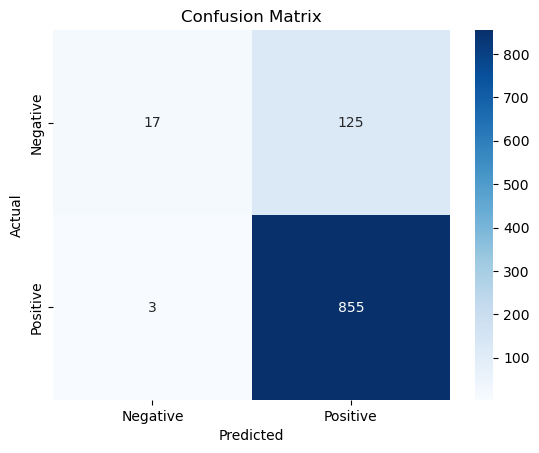

In [161]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


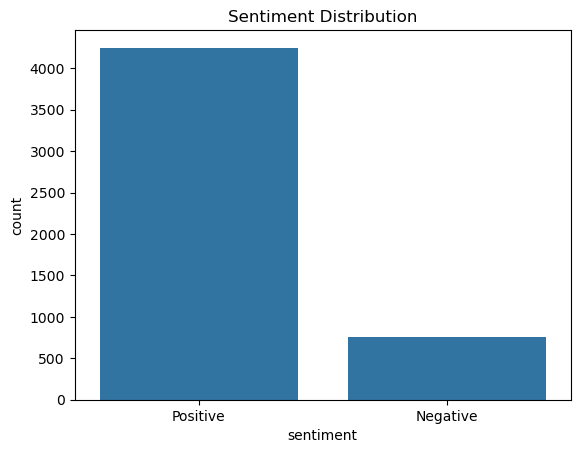

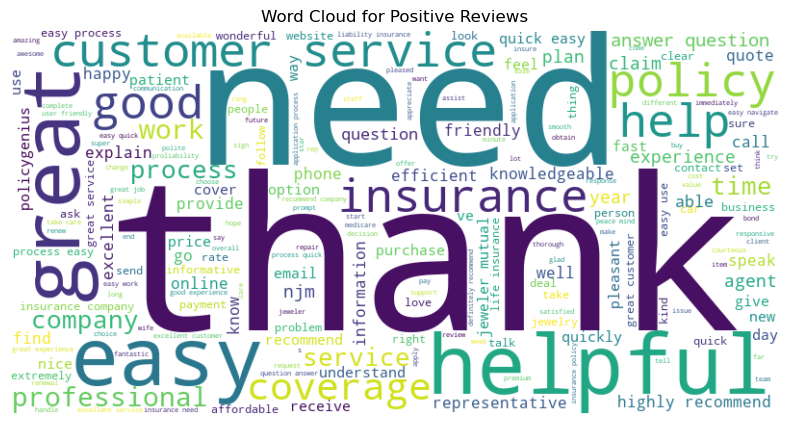

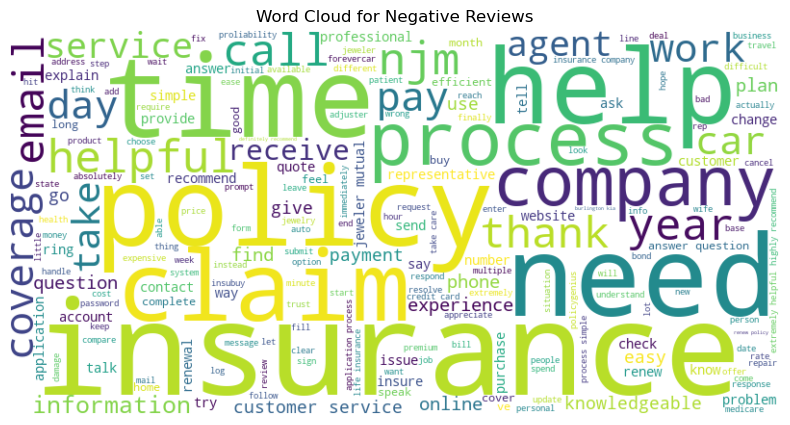

In [163]:
# Sentiment Distribution
sns.countplot(data=df_sampled, x="sentiment", order=["Positive", "Negative"])
plt.title("Sentiment Distribution")
plt.show()

# Word Clouds
for sentiment in ["Positive", "Negative"]:
    text = " ".join(df_sampled[df_sampled["sentiment"] == sentiment]["cleaned_review"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()


In [164]:
import gradio as gr

# Function to run on user input
def analyze_review(review):
    # Preprocess input same way
    clean_review = preprocess_text(review)
    
    # Vectorize input for LDA topic distribution
    bow = vectorizer.transform([clean_review])
    topic_dist = lda_model.transform(bow)[0]
    
    # Prepare topic output string with probabilities
    topic_str = ""
    for i, prob in enumerate(topic_dist):
        topic_str += f"Topic {i+1}: {prob:.3f}\n"
        
    # Sentiment prediction
    sentiment_pred = pipeline.predict([clean_review])[0]
    
    # Named Entities extraction
    doc = nlp(review)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    entities_str = "\n".join([f"{text}: {label}" for text, label in entities]) if entities else "No named entities found."
    
    return topic_str, sentiment_pred, entities_str

# Gradio Interface
iface = gr.Interface(
    fn=analyze_review,
    inputs=gr.Textbox(lines=5, placeholder="Enter customer review here..."),
    outputs=[
        gr.Textbox(label="Topic Distribution"),
        gr.Label(label="Sentiment Prediction"),
        gr.Textbox(label="Named Entities (spaCy)")
    ],
    title="Medical Aid Customer Review Analyzer",
    description="Enter a customer review to get topic distribution, sentiment prediction, and extracted named entities."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


## Conclusion

# Reference List

GeeksforGeeks (2025). Random Forest Hyperparameter Tuning in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/. [Accessed on 22 May 2025]

GeeksforGeeks. (2024). How to Optimize Logistic Regression Performance. [online] Available at: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/#gridsearchcv-for-optimizing-logistic-regression-performance. [Accessed on 20 May 2025]

GeeksforGeeks (2024). Multicollinearity in Regression Analysis. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/multicollinearity-in-regression-analysis/. [Accessed on 22 May 2025]

GeeksforGeeks (2025). Understanding Logistic Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/understanding-logistic-regression/. [Accessed on 22 May 2025]

GeeksforGeeks (2024). Random forest algorithm in machine learning. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ [Accessed on 22 May 2025]

GeeksforGeeks. (2025). Support Vector Machine Algorithm. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/support-vector-machine-algorithm/. [Accessed on 22 May 2025]

GeeksForGeeks (2025). SVM Hyperparameter Tuning using GridSearchCV | ML. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ [Accessed on 22 May 2025]

Keita, Z. (2024). Classification in Machine Learning: A Guide for Beginners. [online] Datacamp. Available at: https://www.datacamp.com/blog/classification-machine-learning. [Accessed on 20 May 2025]

Khan, I. (2021). Classification & Regression in Machine Learning. [online] unpack. Available at: https://medium.com/unpackai/classification-regression-in-machine-learning-7cf3b13b0b09. [Accessed on 20 May 2025]

MiFi. (2017). python - List Highest Correlation Pairs from a Large Correlation Matrix in Pandas? [online] Available at: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas.

‌scikit-learn developers. (n,d.).  accuracy_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html [Accessed on 20 May 2025]

scikit-learn developers. (n,d.).  precision_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html [Accessed on 20 May 2025]
 
scikit-learn developers. (n,d.).  recall_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html [Accessed on 20 May 2025]
  
scikit-learn developers. (n,d.).  f1_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html [Accessed on 20 May 2025]

